# Dialing in mismatch parameter to correctly assemble loci


**20170501**

I need to resolve this splitting loci problem - going to rerun ``ustacks`` using higher mismatch parameters given the number of mismatches I see in really similar sequences that my first run of the pipeline split into different loci. I'm going to do it on just a subset of the samples:

```
FG009	WA_Strait
FG001	WA_Strait
FG102_B	WA_SanJuans
FG100_B	WA_SanJuans
FG205	WA_Dabob
FG212	WA_Dabob
Q324	AK
Q314	AK
Q339	CA_Catalina
Q330	CA_Catalina
```

And, I'll do it with mismatch parameter values of 7, 10, and 13.


## Mismatch parameter 3
I used this parameter value in my first iteration of the Stacks pipeline, in this [notebook](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/data_processing/CRAGIG_RUN1.ipynb).

#### ``ustacks``

I used my ``easy_ustacks`` script to run ``ustacks``, but outside of the notebook because it's interactive in the terminal.

In [3]:
cd /mnt/hgfs/SHARED_FOLDER/Git_repo/CRAGIG_run1/Scripts

/mnt/hgfs/SHARED_FOLDER/Git_repo/CRAGIG_run1/Scripts


In [5]:
!python easy_ustacks.py --help

usage: easy_ustacks.py [-h] -t TYPE -i INPUTDIR [-r] [-d] [-o OUT]
                       [-m MINDEPTH] [-M MAXDIS] [-p THREADS] [-x STARTID] -c
                       COUNT [-P POPMAP]

Write and call a ustacks shell script, and plot results

optional arguments:
  -h, --help            show this help message and exit
  -t TYPE, --type TYPE  input file type; supported types: fasta, fastq,
                        gzfasta, gzfastsq
  -i INPUTDIR, --inputdir INPUTDIR
                        relative path to directory with samples for ustacks
  -r, --removal         enable the removal algorithm to drop highly-repetitive
                        stacks
  -d, --delever         enable the deleveraging algortih for resolving merged
                        tags
  -o OUT, --out OUT     output path to write results
  -m MINDEPTH, --mindepth MINDEPTH
                        minimum depth of coverage required to create a stack;
                        default 2
  -M MAXDIS, --maxdis MAXDIS
         

Running easy_ustacks looked like:
<br>

```
$ python easy_ustacks.py -t fastq -i ../../../../WorkingFolder/Stacks -r -d -o .
./../../../WorkingFolder/Stacks_m3 -m 10 -M 3 -p 10 -c ustacks_loci_counts_m3_20170505.txt -P ../../../../WorkingFolder/popmap_cragigrun1_m10.txt

```

Example line of code from generated bash script:

```
stacks ustacks -f ../../../../WorkingFolder/Stacks/FG009.fq -i 0 -m 10 -t fastq -o ../../../../WorkingFolder/Stacks_m3 -p 10 -M 3 -r -d

```
And the plot of retained ustacks loci looked like:

![image](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/images_for_notebooks/ret_loci_after_ustacks_m3_20170505.png?raw=true)

#### cstacks

I took the ustacks output from allowing 3 mismatches in ustacks, and now will run through cstacks with the same set of mismatch parameters (n = 3,7,10,13,16).

I ran it all together in a bash script:
```
stacks cstacks -b 103 -s Stacks_m3/FG009 -s Stacks_m3/FG001 -s Stacks_m3/FG102_B -s Stacks_m3/FG100_B -s Stacks_m3/FG205 -s Stacks_m3/FG212 -s Stacks_m3/Q324 -s Stacks_m3/Q314 -s Stacks_m3/Q339 -s Stacks_m3/Q330 -o Stacks_m3/n3 -n 3 -p 10
stacks cstacks -b 107 -s Stacks_m3/FG009 -s Stacks_m3/FG001 -s Stacks_m3/FG102_B -s Stacks_m3/FG100_B -s Stacks_m3/FG205 -s Stacks_m3/FG212 -s Stacks_m3/Q324 -s Stacks_m3/Q314 -s Stacks_m3/Q339 -s Stacks_m3/Q330 -o Stacks_m3/n7 -n 7 -p 10
stacks cstacks -b 110 -s Stacks_m3/FG009 -s Stacks_m3/FG001 -s Stacks_m3/FG102_B -s Stacks_m3/FG100_B -s Stacks_m3/FG205 -s Stacks_m3/FG212 -s Stacks_m3/Q324 -s Stacks_m3/Q314 -s Stacks_m3/Q339 -s Stacks_m3/Q330 -o Stacks_m3/n10 -n 10 -p 10
stacks cstacks -b 113 -s Stacks_m3/FG009 -s Stacks_m3/FG001 -s Stacks_m3/FG102_B -s Stacks_m3/FG100_B -s Stacks_m3/FG205 -s Stacks_m3/FG212 -s Stacks_m3/Q324 -s Stacks_m3/Q314 -s Stacks_m3/Q339 -s Stacks_m3/Q330 -o Stacks_m3/n13 -n 13 -p 10
stacks cstacks -b 116 -s Stacks_m3/FG009 -s Stacks_m3/FG001 -s Stacks_m3/FG102_B -s Stacks_m3/FG100_B -s Stacks_m3/FG205 -s Stacks_m3/FG212 -s Stacks_m3/Q324 -s Stacks_m3/Q314 -s Stacks_m3/Q339 -s Stacks_m3/Q330 -o Stacks_m3/n16 -n 16 -p 10
```

Find out retained loci in catalog to see effect of mismatches allowed

In [20]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m3/n3

/mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m3/n3


In [21]:
!grep --count --with-filename consensus batch_103.catalog.tags.tsv

batch_103.catalog.tags.tsv:127316


In [24]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m3/n7

/mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m3/n7


In [25]:
!grep --count --with-filename consensus batch_107.catalog.tags.tsv

batch_107.catalog.tags.tsv:107738


In [41]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m3/n10

/mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m3/n10


In [42]:
!grep --count --with-filename consensus batch_110.catalog.tags.tsv

batch_110.catalog.tags.tsv:102860


In [47]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m3/n13

/mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m3/n13


In [48]:
!grep --count --with-filename consensus batch_113.catalog.tags.tsv

batch_113.catalog.tags.tsv:100194


In [27]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m3/n16

/mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m3/n16


In [28]:
!grep --count --with-filename consensus batch_116.catalog.tags.tsv

batch_116.catalog.tags.tsv:98171


In [36]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
nvals = [3,7,10,13,16]
catalog_counts = [127316,107738,102860,100194,98171]

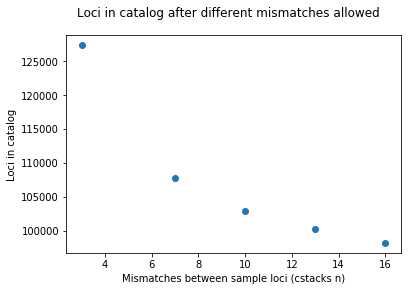

In [30]:
plt.scatter(nvals,catalog_counts)
plt.suptitle("Loci in catalog after different mismatches allowed")
plt.xlabel("Mismatches between sample loci (cstacks n)")
plt.ylabel("Loci in catalog")
plt.show()

### sstacks

I used my easy_sstacks.py script.

Running it in the terminal looked like:

```
python easy_sstacks.py -p 10 -b 103 -P ../../../../WorkingFolder/popmap_cragigrun1_m10.txt -o ../../../../WorkingFolder/Stacks_m3/ -c ../../../../WorkingFolder/Stacks_m3/n3/batch_103 -d ../../../../WorkingFolder/Stacks_m3
```

And an example line of the bash script looked like:

```
stacks sstacks -b 103 -s ../../../../WorkingFolder/Stacks_m3/FG009 -o ../../../../WorkingFolder/Stacks_m3/ -p 10 -c ../../../../WorkingFolder/Stacks_m3/n3/batch_103
```

I ran sstacks on the ustacks output files from M3 mismatches, but with different catalogs (with n3,7,10,13, and 16 mismatches). Ideally, I would have run all mismatch values for cstacks on each fo the ustacks outputs and not just on the M3, but it's pretty time consuming!

Example bash for n = 7:

```
stacks sstacks -b 107 -s ../../../../WorkingFolder/Stacks_m3/Q330 -o ../../../../WorkingFolder/Stacks_m3/n7 -p 10 -c ../../../../WorkingFolder/Stacks_m3/n7/batch_107
```

Example bash for n = 10:

```
stacks sstacks -b 110 -s ../../../../WorkingFolder/Stacks_m3/Q330 -o ../../../../WorkingFolder/Stacks_m3/n10 -p 10 -c ../../../../WorkingFolder/Stacks_m3/n10/batch_110
```

Example bash for n = 13:

```
stacks sstacks -b 113 -s ../../../../WorkingFolder/Stacks_m3/Q330 -o ../../../../WorkingFolder/Stacks_m3/n13 -p 10 -c ../../../../WorkingFolder/Stacks_m3/n13/batch_113 
```

Example bash for n = 16:

```
stacks sstacks -b 116 -s ../../../../WorkingFolder/Stacks_m3/Q330 -o ../../../../WorkingFolder/Stacks_m3/n16/ -p 10 -c ../../../../WorkingFolder/Stacks_m3/n16/batch_116 
```


### populations

I ran populations with the same parameters for each iteration of sstacks. 

In [44]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder

/mnt/hgfs/SHARED_FOLDER/WorkingFolder


In [47]:
# for cstacks with n = 3
!stacks populations -b 103 -P Stacks_m3/n3 -M popmap_cragigrun1_m10.txt -t 10 -r 0.25 -p 2 -m 5 --genepop

Fst kernel smoothing: off
Bootstrap resampling: off
Percent samples limit per population: 0.25
Locus Population limit: 2
Minimum stack depth: 5
Log liklihood filtering: off; threshold: 0
Minor allele frequency cutoff: 0
Maximum observed heterozygosity cutoff: 1
Applying Fst correction: none.
Parsing population map.
Found 10 input file(s).
  5 populations found
    WA_Strait: FG001, FG009
    WA_SanJuans: FG100_B, FG102_B
    WA_Dabob: FG205, FG212
    AK: Q314, Q324
    CA_Catalina: Q330, Q339
  1 group of populations found
    1: WA_Strait, WA_SanJuans, WA_Dabob, AK, CA_Catalina
  Parsing Stacks_m3/n3/batch_103.catalog.tags.tsv
  Parsing Stacks_m3/n3/batch_103.catalog.snps.tsv
  Parsing Stacks_m3/n3/batch_103.catalog.alleles.tsv
Catalog is not reference aligned, arbitrarily ordering catalog loci.
  Parsing Stacks_m3/n3/FG001.matches.tsv
  Parsing Stacks_m3/n3/FG009.matches.tsv
  Parsing Stacks_m3/n3/FG100_B.matches.tsv
  Parsing Stacks_m3/n3/FG102_B.matches.tsv
  Parsing Stacks_m3/n3/

In [48]:
# for cstacks with n = 7
!stacks populations -b 107 -P Stacks_m3/n7 -M popmap_cragigrun1_m10.txt -t 10 -r 0.25 -p 2 -m 5 --genepop

Fst kernel smoothing: off
Bootstrap resampling: off
Percent samples limit per population: 0.25
Locus Population limit: 2
Minimum stack depth: 5
Log liklihood filtering: off; threshold: 0
Minor allele frequency cutoff: 0
Maximum observed heterozygosity cutoff: 1
Applying Fst correction: none.
Parsing population map.
Found 10 input file(s).
  5 populations found
    WA_Strait: FG001, FG009
    WA_SanJuans: FG100_B, FG102_B
    WA_Dabob: FG205, FG212
    AK: Q314, Q324
    CA_Catalina: Q330, Q339
  1 group of populations found
    1: WA_Strait, WA_SanJuans, WA_Dabob, AK, CA_Catalina
  Parsing Stacks_m3/n7/batch_107.catalog.tags.tsv
  Parsing Stacks_m3/n7/batch_107.catalog.snps.tsv
  Parsing Stacks_m3/n7/batch_107.catalog.alleles.tsv
Catalog is not reference aligned, arbitrarily ordering catalog loci.
  Parsing Stacks_m3/n7/FG001.matches.tsv
  Parsing Stacks_m3/n7/FG009.matches.tsv
  Parsing Stacks_m3/n7/FG100_B.matches.tsv
  Parsing Stacks_m3/n7/FG102_B.matches.tsv
  Parsing Stacks_m3/n7/

In [49]:
# for cstacks with n = 10
!stacks populations -b 110 -P Stacks_m3/n10 -M popmap_cragigrun1_m10.txt -t 10 -r 0.25 -p 2 -m 5 --genepop

Fst kernel smoothing: off
Bootstrap resampling: off
Percent samples limit per population: 0.25
Locus Population limit: 2
Minimum stack depth: 5
Log liklihood filtering: off; threshold: 0
Minor allele frequency cutoff: 0
Maximum observed heterozygosity cutoff: 1
Applying Fst correction: none.
Parsing population map.
Found 10 input file(s).
  5 populations found
    WA_Strait: FG001, FG009
    WA_SanJuans: FG100_B, FG102_B
    WA_Dabob: FG205, FG212
    AK: Q314, Q324
    CA_Catalina: Q330, Q339
  1 group of populations found
    1: WA_Strait, WA_SanJuans, WA_Dabob, AK, CA_Catalina
  Parsing Stacks_m3/n10/batch_110.catalog.tags.tsv
  Parsing Stacks_m3/n10/batch_110.catalog.snps.tsv
  Parsing Stacks_m3/n10/batch_110.catalog.alleles.tsv
Catalog is not reference aligned, arbitrarily ordering catalog loci.
  Parsing Stacks_m3/n10/FG001.matches.tsv
  Parsing Stacks_m3/n10/FG009.matches.tsv
  Parsing Stacks_m3/n10/FG100_B.matches.tsv
  Parsing Stacks_m3/n10/FG102_B.matches.tsv
  Parsing Stacks

In [50]:
# for cstacks with n = 13
!stacks populations -b 113 -P Stacks_m3/n13 -M popmap_cragigrun1_m10.txt -t 10 -r 0.25 -p 2 -m 5 --genepop

Fst kernel smoothing: off
Bootstrap resampling: off
Percent samples limit per population: 0.25
Locus Population limit: 2
Minimum stack depth: 5
Log liklihood filtering: off; threshold: 0
Minor allele frequency cutoff: 0
Maximum observed heterozygosity cutoff: 1
Applying Fst correction: none.
Parsing population map.
Found 10 input file(s).
  5 populations found
    WA_Strait: FG001, FG009
    WA_SanJuans: FG100_B, FG102_B
    WA_Dabob: FG205, FG212
    AK: Q314, Q324
    CA_Catalina: Q330, Q339
  1 group of populations found
    1: WA_Strait, WA_SanJuans, WA_Dabob, AK, CA_Catalina
  Parsing Stacks_m3/n13/batch_113.catalog.tags.tsv
  Parsing Stacks_m3/n13/batch_113.catalog.snps.tsv
  Parsing Stacks_m3/n13/batch_113.catalog.alleles.tsv
Catalog is not reference aligned, arbitrarily ordering catalog loci.
  Parsing Stacks_m3/n13/FG001.matches.tsv
  Parsing Stacks_m3/n13/FG009.matches.tsv
  Parsing Stacks_m3/n13/FG100_B.matches.tsv
  Parsing Stacks_m3/n13/FG102_B.matches.tsv
  Parsing Stacks

In [52]:
# for cstacks with n = 16
!stacks populations -b 116 -P Stacks_m3/n16 -M popmap_cragigrun1_m10.txt -t 10 -r 0.25 -p 2 -m 5 --genepop

Fst kernel smoothing: off
Bootstrap resampling: off
Percent samples limit per population: 0.25
Locus Population limit: 2
Minimum stack depth: 5
Log liklihood filtering: off; threshold: 0
Minor allele frequency cutoff: 0
Maximum observed heterozygosity cutoff: 1
Applying Fst correction: none.
Parsing population map.
Found 10 input file(s).
  5 populations found
    WA_Strait: FG001, FG009
    WA_SanJuans: FG100_B, FG102_B
    WA_Dabob: FG205, FG212
    AK: Q314, Q324
    CA_Catalina: Q330, Q339
  1 group of populations found
    1: WA_Strait, WA_SanJuans, WA_Dabob, AK, CA_Catalina
  Parsing Stacks_m3/n16/batch_116.catalog.tags.tsv
  Parsing Stacks_m3/n16/batch_116.catalog.snps.tsv
  Parsing Stacks_m3/n16/batch_116.catalog.alleles.tsv
Catalog is not reference aligned, arbitrarily ordering catalog loci.
  Parsing Stacks_m3/n16/FG001.matches.tsv
  Parsing Stacks_m3/n16/FG009.matches.tsv
  Parsing Stacks_m3/n16/FG100_B.matches.tsv
  Parsing Stacks_m3/n16/FG102_B.matches.tsv
  Parsing Stacks

In [53]:
pwd

u'/mnt/hgfs/SHARED_FOLDER/WorkingFolder'

## Mismatch parameter 7

#### ``ustacks``

Running easy_ustacks looked like:
<br>

```
$ python easy_ustacks.py -t fastq -i ../../../../WorkingFolder/Stacks -r -d -o ../../../../WorkingFolder/Stacks_m7 -m 10 -M 7 -p 10 -c ustacks_loci_counts_20170503.txt -P ../../../../WorkingFolder/popmap_cragigrun1_m10.txt
```

Example line of code from generated bash script:

```
stacks ustacks -f ../../../../WorkingFolder/Stacks/FG009.fq -i 0 -m 10 -t fastq -o ../../../../WorkingFolder/Stacks_m7 -p 10 -M 7 -r -d

```
And the plot of retained ustacks loci looked like:

![image](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/images_for_notebooks/ret_loc_after_ustacks_m7_20170503.png?raw=true)

## Mismatch parameter 10

#### ``ustacks``

Running easy_ustacks looked like:
<br>
```
$ python easy_ustacks.py -t fastq -i ../../../../WorkingFolder/Stacks -r -d -o Stacks_m10 -m 10 -M 10 -p 10 -c ../../../../WorkingFolder/Stacks_m10/ustacks_loci_counts_20170501.txt -P ../../../../WorkingFolder/popmap_cragigrun1_m10.txt

```

Example line of code from generated bash script:

```
stacks ustacks -f ../../../../WorkingFolder/Stacks/FG009.fq -i 0 -m 10 -t fastq -o ../../../../WorkingFolder/Stacks_m10 -p 10 -M 10 -r -d 

```
And the plot of retained ustacks loci looked like:

![image](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/images_for_notebooks/ret_loci_after_ustacks_m10_20170503.png?raw=true)

## Mismatch parameter 13

#### ``ustacks``

Running easy_ustacks looked like:
<br>

```
$ python easy_ustacks.py -t fastq -i ../../../../WorkingFolder/Stacks -r -d -o .
./../../../WorkingFolder/Stacks_m13 -m 10 -M 13 -p 10 -c ustacks_loci_counts_m13_20170503.txt -P ../../../../WorkingFolder/popmap_cragigrun1_m10.txt

```

Example line of code from generated bash script:

```
stacks ustacks -f ../../../../WorkingFolder/Stacks/FG009.fq -i 0 -m 10 -t fastq -o ../../../../WorkingFolder/Stacks_m13 -p 10 -M 13 -r -d 
```
And the plot of retained ustacks loci looked like:

![image](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/images_for_notebooks/ret_loci_after_ustacks_m13_20170505.png?raw=true)

## Mismatch parameter 16

#### ``ustacks``

Running easy_ustacks looked like:
<br>

```
$ python easy_ustacks.py -t fastq -i ../../../../WorkingFolder/Stacks -r -d -o .
./../../../WorkingFolder/Stacks_m16 -m 10 -M 16 -p 10 -c ustacks_loci_counts_m16_20170505.txt -P ../../../../WorkingFolder/popmap_cragigrun1_m10.txt

```

Example line of code from generated bash script:

```
stacks ustacks -f ../../../../WorkingFolder/Stacks/FG009.fq -i 0 -m 10 -t fastq -o ../../../../WorkingFolder/Stacks_m16 -p 10 -M 16 -r -d 
```
And the plot of retained ustacks loci looked like:

![image](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/images_for_notebooks/ret_loci_after_ustacks_m16_20170508.png?raw=true)

## Effect of ustacks ``M`` on number of retained loci after ustacks

**20170508**

In [4]:
cd /mnt/hgfs/SHARED_FOLDER

/mnt/hgfs/SHARED_FOLDER


In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
ret_loci = open("m_and_ret_loci_20170508.csv","r")
lines = ret_loci.readlines()
ret_loci.close()

In [10]:
list_array = []
for line in lines:
    linelist = line.strip().split(",")
    list_array.append(linelist)

In [11]:
print list_array[1]

['FG001', '28888', '27512', '27274', '27224', '27211']


In [8]:
mvals = [3,7,10,13,16]

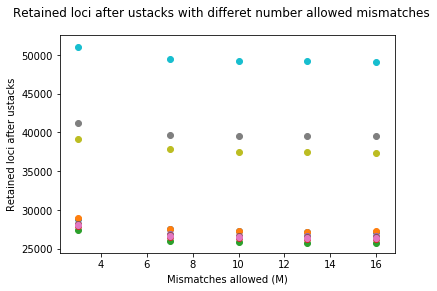

In [18]:
for line in list_array[1:]:
    sample = line[0]
    counts_ch = (line[1:])
    counts_int = []
    for count in counts_ch:
        int_count = int(count)
        counts_int.append(int_count)
    plt.scatter(mvals, counts_int)

plt.suptitle("Retained loci after ustacks with differet number allowed mismatches")  
plt.xlabel("Mismatches allowed (M)")
plt.ylabel("Retained loci after ustacks")
plt.show()

Wow. Almost no effect at all. Increasing the M parameter seems to almost not affect the number of retained loci after ustacks. The drop is just a couple hundred loci after M = 6.

## Investigating a la Ilut etal 2014

**20170509**

In [Ilut et al 2014](https://www.hindawi.com/journals/bmri/2014/675158/abs/), the authors develop a method for choosing an appropriate mismatch parameter. Essentially, they increase mismatch, and track the percentage of homozygous, heterozygous, and polyploid genotypes within individuals. Where they asymptote is a balance between allowing for lumping of paralogous loci, and oversplitting loci. Here's the main figure for this:

![img](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/images_for_notebooks/ilut_et_al_2014_mainfigs.png?raw=true)

I should open the same individual file under the different mismatch parameters in ustacks from above, and make these plots. I just went through and did that, but realized that homologous tags don't get documented in the alleles file. So, I'll need to pull from one of the other files.

In [12]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m3

/mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m3


In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# get lines from file
FG001_m3 = open("FG001.alleles.tsv")
FG001_m3_lines = FG001_m3.readlines()
FG001_m3.close()

# build dictionary with number of alleles per locus
FG001_m3_alleles = {}
FG001_m3_loci = []
for line in FG001_m3_lines[1:]: # skip first line, header
    linelist = line.strip().split()
    locus_name = int(linelist[2])
    if locus_name not in FG001_m3_loci:    
        FG001_m3_loci.append(locus_name)
    if locus_name not in FG001_m3_alleles:
        FG001_m3_alleles[locus_name] = 1
    elif locus_name in FG001_m3_alleles:
        FG001_m3_alleles[locus_name] += 1
    else:
        print "something funky is going on"
        
# get counts homozygous, heterozygous, and polyploid
FG001_m3_het = 0
FG001_m3_poly = 0

for locus in FG001_m3_loci:
    if FG001_m3_alleles[locus] == 2:
        FG001_m3_het += 1
    elif FG001_m3_alleles[locus] > 2:
        FG001_m3_poly += 1
        
        
# pull homozygote info from snps file
FG001_m3_SNP = open("FG001.snps.tsv")
FG001_m3_SNP_lines = FG001_m3_SNP.readlines()
FG001_m3_SNP.close()

FG001_m3_hom_loci = []
for line in FG001_m3_SNP_lines:
    linelist = line.strip().split()
    locus_name = linelist[2]
    secondary = linelist[7]
    if secondary != "-":
        if locus_name not in FG001_m3_hom_loci:
            FG001_m3_hom_loci.append(locus_name)   

FG001_m3_hom = len(FG001_m3_hom_loci)

FG001_m3_total = FG001_m3_hom + FG001_m3_het + FG001_m3_poly

# report to user
print "For m = 3: "
print "Percentage homozygous: " + str(float(FG001_m3_hom)/float(FG001_m3_total)*100) + "%"
print "Percentage heterozygous: " + str(float(FG001_m3_het)/float(FG001_m3_total)*100) + "%"
print "Percentage polyploid: " + str(float(FG001_m3_poly)/float(FG001_m3_total)*100) + "%"
print "Total loci = " + str(FG001_m3_total)

For m = 3: 
Percentage homozygous: 50.5662829558%
Percentage heterozygous: 40.2060898626%
Percentage polyploid: 9.22762718158%
Total loci = 10772


In [15]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m7

/mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m7


In [16]:
# get lines from file
FG001_m7 = open("FG001.alleles.tsv")
FG001_m7_lines = FG001_m7.readlines()
FG001_m7.close()

# build dictionary with number of alleles per locus
FG001_m7_alleles = {}
FG001_m7_loci = []
for line in FG001_m7_lines[1:]: # skip first line, header
    linelist = line.strip().split()
    locus_name = int(linelist[2])
    if locus_name not in FG001_m7_loci:    
        FG001_m7_loci.append(locus_name)
    if locus_name not in FG001_m7_alleles:
        FG001_m7_alleles[locus_name] = 1
    elif locus_name in FG001_m7_alleles:
        FG001_m7_alleles[locus_name] += 1
    else:
        print "something funky is going on"
        
# get counts homozygous, heterozygous, and polyploid
FG001_m7_het = 0
FG001_m7_poly = 0

for locus in FG001_m7_loci:
    if FG001_m7_alleles[locus] == 2:
        FG001_m7_het += 1
    elif FG001_m7_alleles[locus] > 2:
        FG001_m7_poly += 1
        
        
# pull homozygote info from snps file
FG001_m7_SNP = open("FG001.snps.tsv")
FG001_m7_SNP_lines = FG001_m7_SNP.readlines()
FG001_m7_SNP.close()

FG001_m7_hom_loci = []
for line in FG001_m7_SNP_lines:
    linelist = line.strip().split()
    locus_name = linelist[2]
    secondary = linelist[7]
    if secondary != "-":
        if locus_name not in FG001_m7_hom_loci:
            FG001_m7_hom_loci.append(locus_name)   

FG001_m7_hom = len(FG001_m7_hom_loci)

FG001_m7_total = FG001_m7_hom + FG001_m7_het + FG001_m7_poly

# report to user
print "For m = 7: "
print "Percentage homozygous: " + str(float(FG001_m7_hom)/float(FG001_m7_total)*100) + "%"
print "Percentage heterozygous: " + str(float(FG001_m7_het)/float(FG001_m7_total)*100) + "%"
print "Percentage polyploid: " + str(float(FG001_m7_poly)/float(FG001_m7_total)*100) + "%"
print "Total loci = " + str(FG001_m7_total)

For m = 7: 
Percentage homozygous: 50.5560116427%
Percentage heterozygous: 35.7787894619%
Percentage polyploid: 13.6651988954%
Total loci = 13399


In [17]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m10

/mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m10


In [18]:
# get lines from file
FG001_m10 = open("FG001.alleles.tsv")
FG001_m10_lines = FG001_m10.readlines()
FG001_m10.close()

# build dictionary with number of alleles per locus
FG001_m10_alleles = {}
FG001_m10_loci = []
for line in FG001_m10_lines[1:]: # skip first line, header
    linelist = line.strip().split()
    locus_name = int(linelist[2])
    if locus_name not in FG001_m10_loci:    
        FG001_m10_loci.append(locus_name)
    if locus_name not in FG001_m10_alleles:
        FG001_m10_alleles[locus_name] = 1
    elif locus_name in FG001_m10_alleles:
        FG001_m10_alleles[locus_name] += 1
    else:
        print "something funky is going on"
        
# get counts homozygous, heterozygous, and polyploid
FG001_m10_het = 0
FG001_m10_poly = 0

for locus in FG001_m10_loci:
    if FG001_m10_alleles[locus] == 2:
        FG001_m10_het += 1
    elif FG001_m10_alleles[locus] > 2:
        FG001_m10_poly += 1
        
        
# pull homozygote info from snps file
FG001_m10_SNP = open("FG001.snps.tsv")
FG001_m10_SNP_lines = FG001_m10_SNP.readlines()
FG001_m10_SNP.close()

FG001_m10_hom_loci = []
for line in FG001_m10_SNP_lines:
    linelist = line.strip().split()
    locus_name = linelist[2]
    secondary = linelist[7]
    if secondary != "-":
        if locus_name not in FG001_m10_hom_loci:
            FG001_m10_hom_loci.append(locus_name)   

FG001_m10_hom = len(FG001_m10_hom_loci)

FG001_m10_total = FG001_m10_hom + FG001_m10_het + FG001_m10_poly

# report to user
print "For m = 10: "
print "Percentage homozygous: " + str(float(FG001_m10_hom)/float(FG001_m10_total)*100) + "%"
print "Percentage heterozygous: " + str(float(FG001_m10_het)/float(FG001_m10_total)*100) + "%"
print "Percentage polyploid: " + str(float(FG001_m10_poly)/float(FG001_m10_total)*100) + "%"
print "Total loci = " + str(FG001_m10_total)

For m = 10: 
Percentage homozygous: 50.5884041332%
Percentage heterozygous: 33.9121699196%
Percentage polyploid: 15.4994259472%
Total loci = 13936


In [19]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m13

/mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m13


In [20]:
# get lines from file
FG001_m13 = open("FG001.alleles.tsv")
FG001_m13_lines = FG001_m13.readlines()
FG001_m13.close()

# build dictionary with number of alleles per locus
FG001_m13_alleles = {}
FG001_m13_loci = []
for line in FG001_m13_lines[1:]: # skip first line, header
    linelist = line.strip().split()
    locus_name = int(linelist[2])
    if locus_name not in FG001_m13_loci:    
        FG001_m13_loci.append(locus_name)
    if locus_name not in FG001_m13_alleles:
        FG001_m13_alleles[locus_name] = 1
    elif locus_name in FG001_m13_alleles:
        FG001_m13_alleles[locus_name] += 1
    else:
        print "something funky is going on"
        
# get counts homozygous, heterozygous, and polyploid
FG001_m13_het = 0
FG001_m13_poly = 0

for locus in FG001_m13_loci:
    if FG001_m13_alleles[locus] == 2:
        FG001_m13_het += 1
    elif FG001_m13_alleles[locus] > 2:
        FG001_m13_poly += 1
        
        
# pull homozygote info from snps file
FG001_m13_SNP = open("FG001.snps.tsv")
FG001_m13_SNP_lines = FG001_m13_SNP.readlines()
FG001_m13_SNP.close()

FG001_m13_hom_loci = []
for line in FG001_m13_SNP_lines:
    linelist = line.strip().split()
    locus_name = linelist[2]
    secondary = linelist[7]
    if secondary != "-":
        if locus_name not in FG001_m13_hom_loci:
            FG001_m13_hom_loci.append(locus_name)   

FG001_m13_hom = len(FG001_m13_hom_loci)

FG001_m13_total = FG001_m13_hom + FG001_m13_het + FG001_m13_poly

# report to user
print "For m = 13: "
print "Percentage homozygous: " + str(float(FG001_m13_hom)/float(FG001_m13_total)*100) + "%"
print "Percentage heterozygous: " + str(float(FG001_m13_het)/float(FG001_m13_total)*100) + "%"
print "Percentage polyploid: " + str(float(FG001_m13_poly)/float(FG001_m13_total)*100) + "%"
print "Total loci = " + str(FG001_m13_total)

For m = 13: 
Percentage homozygous: 50.576594533%
Percentage heterozygous: 33.1079157175%
Percentage polyploid: 16.3154897494%
Total loci = 14048


In [21]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m16

/mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m16


In [22]:
# get lines from file
FG001_m16 = open("FG001.alleles.tsv")
FG001_m16_lines = FG001_m16.readlines()
FG001_m16.close()

# build dictionary with number of alleles per locus
FG001_m16_alleles = {}
FG001_m16_loci = []
for line in FG001_m16_lines[1:]: # skip first line, header
    linelist = line.strip().split()
    locus_name = int(linelist[2])
    if locus_name not in FG001_m16_loci:    
        FG001_m16_loci.append(locus_name)
    if locus_name not in FG001_m16_alleles:
        FG001_m16_alleles[locus_name] = 1
    elif locus_name in FG001_m16_alleles:
        FG001_m16_alleles[locus_name] += 1
    else:
        print "something funky is going on"
        
# get counts homozygous, heterozygous, and polyploid
FG001_m16_het = 0
FG001_m16_poly = 0

for locus in FG001_m16_loci:
    if FG001_m16_alleles[locus] == 2:
        FG001_m16_het += 1
    elif FG001_m16_alleles[locus] > 2:
        FG001_m16_poly += 1
        
        
# pull homozygote info from snps file
FG001_m16_SNP = open("FG001.snps.tsv")
FG001_m16_SNP_lines = FG001_m16_SNP.readlines()
FG001_m16_SNP.close()

FG001_m16_hom_loci = []
for line in FG001_m16_SNP_lines:
    linelist = line.strip().split()
    locus_name = linelist[2]
    secondary = linelist[7]
    if secondary != "-":
        if locus_name not in FG001_m16_hom_loci:
            FG001_m16_hom_loci.append(locus_name)   

FG001_m16_hom = len(FG001_m16_hom_loci)

FG001_m16_total = FG001_m16_hom + FG001_m16_het + FG001_m16_poly

# report to user
print "For m = 16: "
print "Percentage homozygous: " + str(float(FG001_m16_hom)/float(FG001_m16_total)*100) + "%"
print "Percentage heterozygous: " + str(float(FG001_m16_het)/float(FG001_m16_total)*100) + "%"
print "Percentage polyploid: " + str(float(FG001_m16_poly)/float(FG001_m16_total)*100) + "%"
print "Total loci = " + str(FG001_m16_total)

For m = 16: 
Percentage homozygous: 50.568101122%
Percentage heterozygous: 32.4953841784%
Percentage polyploid: 16.9365146996%
Total loci = 14082


**Getting homozygous RAD tag count from SNPs files**

In [25]:
mvals = [3,7,10,13,16]
set_hom = [50.6,50.6,50.6,50.6,50.6]
set_het = [40.2,35.8,33.9,33.1,32.49]
set_poly = [9.2,13.7,15.5,16.3,16.9]

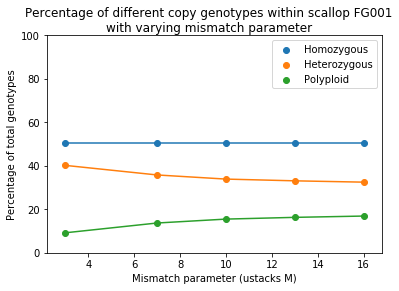

In [26]:
hom = plt.scatter(mvals, set_hom)
plt.plot(mvals, set_hom)
het = plt.scatter(mvals, set_het)
plt.plot(mvals, set_het)
poly = plt.scatter(mvals, set_poly)
plt.plot(mvals, set_poly)
plt.ylim(0,100)
plt.suptitle("Percentage of different copy genotypes within scallop FG001\nwith varying mismatch parameter")
plt.xlabel("Mismatch parameter (ustacks M)")
plt.ylabel("Percentage of total genotypes")
plt.legend((hom, het, poly),("Homozygous","Heterozygous","Polyploid"))
plt.show()

I do want to hesitate a little in the interpretation of this figure, because I'm not confident in the clustering method in ustacks given the high repetitve content and higher SNP/indel rate. Also, the plots from the paper all seem to show the homozygote curve decreasing as M increases, and the heterozygous curve increasing as M increases, and I see neither. Otherwise, it looks like according to how Ilut draws the line, I'd want around 10 mismatches to best balance oversplitting + undersplitting.

In a different window